In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
import acquire
import prepare
from wordcloud import WordCloud
import nltk.sentiment
pd.set_option('display.max_colwidth', -1)
from time import strftime

<ipython-input-1-7d018c37cb01>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# 1. Spam Data

## a. Load the spam data set.

In [2]:
#acquire data from spam_db

from env import user, password, host

# def get_db_url(database, host=host, user=user, password=password):
#     return f'mysql+pymysql://{user}:{password}@{host}/{database}'


# url = get_db_url("spam_db")
# sql = "SELECT * FROM spam"

# df = pd.read_sql(sql, url, index_col="id")

raw = pd.read_csv("spam_clean - spam_clean.csv")

raw.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
import prepare
raw['cleaned']=raw.text.apply(prepare.basic_clean).apply(prepare.tokenize)\
.apply(prepare.remove_stopwords, extra_words=[], 
                                   exclude_words=[])
# df.head()

In [4]:
raw['stemmed'] = raw.cleaned.apply(prepare.stem)
# df.head()

In [5]:
raw['lemmatized']= raw.cleaned.apply(prepare.lemmatize)

In [6]:
raw.head()

,label,text,cleaned,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though


In [7]:
raw.label.value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
lemmatized_df = raw.drop(columns=['text','cleaned','stemmed'])
lemmatized_df.head(1)

,label,lemmatized
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [9]:
# def clean(text):
#     '''Simplified text cleaning function'''
#     text = text.lower()
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     return re.sub(r"[^a-z0-9\s]", '', text)

In [10]:
# combine all messages in single string by label

ham_words = (' '.join(raw[raw.label == 'ham'].lemmatized))
spam_words = (' '.join(raw[raw.label == 'spam'].lemmatized))
all_words = (' '.join(raw.lemmatized))

In [11]:
# ham_words

## b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

<AxesSubplot:>

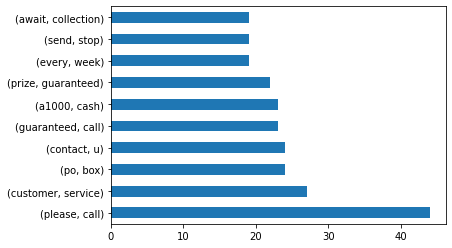

In [12]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()

In [13]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
spam_bigrams.head(10),

(0    (free, entry)
 1    (entry, 2)   
 2    (2, wkly)    
 3    (wkly, comp) 
 4    (comp, win)  
 5    (win, fa)    
 6    (fa, cup)    
 7    (cup, final) 
 8    (final, tkts)
 9    (tkts, 21st) 
 dtype: object,)

In [14]:
# data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}

In [15]:
# len(data)

In [16]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [17]:
def make_bigrams_list(series):
    '''
    Function that converts a series of bigrams into a list
    '''
    bigrams_list = []
    for bigram in series:
        bigram = list(bigram)
        bigram = ' '.join(bigram)
        bigrams_list.append(bigram)
    return bigrams_list

In [18]:
# make_bigrams_list(spam_bigrams)

In [19]:
# this code was working earlier and helped me create the above function. 
# commenting out and moving forwar for now


# for bigram in spam_bigrams:
#     biggy = list(bigram)
#     biggy = ' '.join(biggy)
#     print(biggy)


#### Ok good work getting the VADER analysis on each bigram. Now, get it in a DF

In [20]:
spam_bigrams

0        (free, entry)           
1        (entry, 2)              
2        (2, wkly)               
3        (wkly, comp)            
4        (comp, win)             
            ...                  
12499    (087187272008, now1)    
12500    (now1, 10p)             
12501    (10p, per)              
12502    (per, minute)           
12503    (minute, btnationalrate)
Length: 12504, dtype: object

In [21]:
# test = pd.DataFrame(pd.Series(pd.Series(nltk.bigrams(spam_words.split()))),columns=['bigram'])
# test.head()

big_spam_df = pd.DataFrame(pd.Series(make_bigrams_list(spam_bigrams)),columns=['bigram'])
big_spam_df.head()

,bigram
0,free entry
1,entry 2
2,2 wkly
3,wkly comp
4,comp win


In [22]:

big_spam_df.shape

(12504, 1)

In [23]:
big_spam_df['sentiment'] = big_spam_df.bigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

big_spam_df['label'] = 'spam'
big_spam_df.head()


,bigram,sentiment,label
0,free entry,0.5106,spam
1,entry 2,0.0000,spam
2,2 wkly,0.0000,spam
3,wkly comp,0.0000,spam
4,comp win,0.5859,spam


### Great work, got the VADER sentiment analysis for each bigram

In [24]:
big_spam_df.sort_values(by='sentiment')

,bigram,sentiment,label
183,jersey devil,-0.6597,spam
184,devil detroit,-0.6597,spam
9811,potential abuse,-0.6369,spam
11216,tsunami disaster,-0.6249,spam
5706,bitch go,-0.5859,spam
...,...,...,...
5082,love satisfy,0.8020,spam
7670,fun great,0.8126,spam
4259,win winner,0.8225,spam
10579,win winner,0.8225,spam


In [25]:
big_spam_df[big_spam_df.sentiment < 0].sort_values(by='sentiment').head(10)

,bigram,sentiment,label
183,jersey devil,-0.6597,spam
184,devil detroit,-0.6597,spam
9811,potential abuse,-0.6369,spam
11216,tsunami disaster,-0.6249,spam
5706,bitch go,-0.5859,spam
5013,po box,-0.5574,spam
5113,uk po,-0.5574,spam
5114,po box,-0.5574,spam
5164,ntt po,-0.5574,spam
5165,po box,-0.5574,spam


In [26]:
big_spam_df[big_spam_df.sentiment > 0].sort_values(by='sentiment').tail(10)

,bigram,sentiment,label
8278,win free,0.7964,spam
6575,sunshine congratulation,0.7964,spam
3694,win free,0.7964,spam
4093,win vip,0.7964,spam
4178,win free,0.7964,spam
5082,love satisfy,0.8020,spam
7670,fun great,0.8126,spam
10579,win winner,0.8225,spam
4259,win winner,0.8225,spam
10428,win super,0.8271,spam


In [27]:
big_spam_df.bigram.value_counts()

please call         44
customer service    27
po box              24
contact u           24
guaranteed call     23
                    ..
sept go             1 
happy gay           1 
get txts            1 
ill send            1 
end today           1 
Name: bigram, Length: 7036, dtype: int64

### my dataframe is messed up, in that it is composed of the value_counts on the bigrams, not handy for further explo.  fixing now...

### ALL FIXED

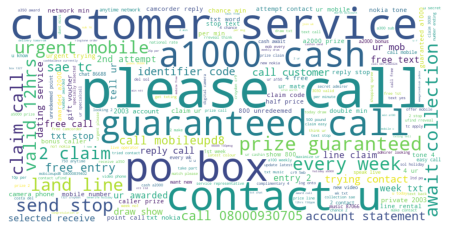

In [28]:
# value_counts bc we want the most commonly occuring bigrams at the forefront
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()


data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

- that’s a dictionary comprehension - kinda like a list comprehension but w/ dictionary keys and values
- the convention is `k` for the key name and `v` for the value that that particular key points to

In [29]:
# this would be to have a look at the ham bigrams
# pd.Series(nltk.bigrams(ham_words.split())).value_counts()#.head(10).plot.barh()

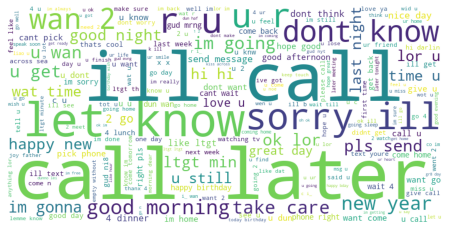

In [30]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
# ham_bigrams.head()
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

<AxesSubplot:>

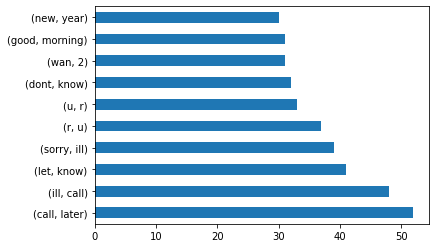

In [31]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()

In [32]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split()))
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
ham_bigrams.head(),

(0    (go, jurong)      
 1    (jurong, point)   
 2    (point, crazy)    
 3    (crazy, available)
 4    (available, bugis)
 dtype: object,)

In [33]:
# test = pd.DataFrame(pd.Series(pd.Series(nltk.bigrams(spam_words.split()))),columns=['bigram'])
# test.head()

big_ham_df = pd.DataFrame(pd.Series(make_bigrams_list(ham_bigrams)),columns=['bigram'])
big_ham_df.head()


,bigram
0,go jurong
1,jurong point
2,point crazy
3,crazy available
4,available bugis


In [34]:
big_ham_df.shape

(39825, 1)

In [35]:
big_ham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39825 entries, 0 to 39824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bigram  39825 non-null  object
dtypes: object(1)
memory usage: 311.3+ KB


In [36]:
big_ham_df['sentiment'] = big_ham_df.bigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

big_ham_df['label'] = 'ham'
big_ham_df.head()


,bigram,sentiment,label
0,go jurong,0.00,ham
1,jurong point,0.00,ham
2,point crazy,-0.34,ham
3,crazy available,-0.34,ham
4,available bugis,0.00,ham


In [37]:
big_ham_df.sort_values(by='sentiment')

,bigram,sentiment,label
30607,motherfucker hurt,-0.8402,ham
23519,arrested murderer,-0.8271,ham
17302,arrested murderer,-0.8271,ham
19249,arrested murderer,-0.8271,ham
440,pain killing,-0.8271,ham
...,...,...,...
29353,love loving,0.8442,ham
14353,love lmao,0.8442,ham
35915,love great,0.8519,ham
25625,love great,0.8519,ham


In [38]:
big_ham_df.bigram.value_counts()

call later          52
ill call            48
let know            41
sorry ill           39
r u                 37
                    ..
little weather      1 
class pls           1 
person establish    1 
ur report           1 
tight morning       1 
Name: bigram, Length: 31377, dtype: int64

## c. Is there any overlap in the bigrams for the spam data and the ham data?

In [39]:
bigram_df = big_spam_df.merge(big_ham_df, how='outer')
bigram_df.head()

,bigram,sentiment,label
0,free entry,0.5106,spam
1,free entry,0.5106,spam
2,free entry,0.5106,spam
3,free entry,0.5106,spam
4,free entry,0.5106,spam


In [40]:
bigram_df.shape

(52329, 3)

In [41]:
bigram_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52329 entries, 0 to 52328
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bigram     52329 non-null  object 
 1   sentiment  52329 non-null  float64
 2   label      52329 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [42]:
bigram_df.describe()

,sentiment
count,52329.000000
mean,0.059386
std,0.220289
min,-0.840200
25%,0.000000
50%,0.000000
75%,0.000000
max,0.855500


- the average sentiment is just above neutral, and roughly equal max/min

In [43]:
bigram_df.head(2)

,bigram,sentiment,label
0,free entry,0.5106,spam
1,free entry,0.5106,spam


In [44]:
# bigram_df[bigram_df[bigram_df.label == 'spam'].bigram & bigram_df[bigram_df.label == 'ham'].bigram]

In [45]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))


ham_bigram_freq = pd.Series(make_bigrams_list(ham_bigrams)).value_counts()
spam_bigram_freq = pd.Series(make_bigrams_list(spam_bigrams)).value_counts()
# all_freq = pd.Series(all_words.split()).value_counts()

In [46]:
spam_bigram_freq

please call         44
customer service    27
po box              24
contact u           24
guaranteed call     23
                    ..
sept go             1 
happy gay           1 
get txts            1 
ill send            1 
end today           1 
Length: 7036, dtype: int64

In [47]:
bigram_counts = pd.concat([ham_bigram_freq, spam_bigram_freq], axis=1).fillna(0).astype(int)
bigram_counts.columns = ['ham_bigram', 'spam_bigram']
bigram_counts.head()

,ham_bigram,spam_bigram
call later,52,0
ill call,48,0
let know,41,0
sorry ill,39,0
r u,37,3


In [48]:
bigram_counts[bigram_counts.ham_bigram == bigram_counts.spam_bigram].head(20)

,ham_bigram,spam_bigram
u like,4,4
send u,2,2
tonight want,2,2
2 take,2,2
u receive,1,1
ive found,1,1
day get,1,1
u text,1,1
text get,1,1
maybe even,1,1


## d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

<AxesSubplot:>

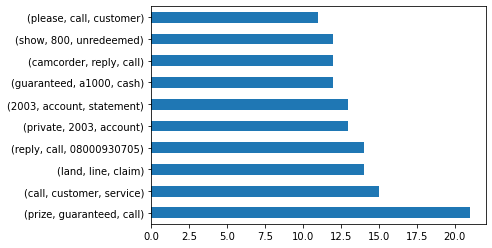

In [49]:
pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()

In [50]:
spam_trigrams = pd.Series(nltk.trigrams(spam_words.split()))
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
spam_trigrams.head(10),

(0    (free, entry, 2)   
 1    (entry, 2, wkly)   
 2    (2, wkly, comp)    
 3    (wkly, comp, win)  
 4    (comp, win, fa)    
 5    (win, fa, cup)     
 6    (fa, cup, final)   
 7    (cup, final, tkts) 
 8    (final, tkts, 21st)
 9    (tkts, 21st, may)  
 dtype: object,)

In [51]:
ham_trigrams = pd.Series(nltk.trigrams(ham_words.split()))
ham_trigrams.head(10)

0    (go, jurong, point)      
1    (jurong, point, crazy)   
2    (point, crazy, available)
3    (crazy, available, bugis)
4    (available, bugis, n)    
5    (bugis, n, great)        
6    (n, great, world)        
7    (great, world, la)       
8    (world, la, e)           
9    (la, e, buffet)          
dtype: object

In [52]:
def make_trigrams_list(series):
    trigrams_list = []
    for trigram in series:
        trigram = list(trigram)
        trigram = ' '.join(trigram)
        trigrams_list.append(trigram)
    return trigrams_list

In [53]:
# make_trigrams_list(spam_trigrams)

In [54]:
trig_spam_df = pd.DataFrame(pd.Series(make_trigrams_list(spam_trigrams)),columns=['trigram'])
trig_spam_df['sentiment'] = trig_spam_df.trigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

trig_spam_df['label'] = 'spam'

trig_spam_df.head()

,trigram,sentiment,label
0,free entry 2,0.5106,spam
1,entry 2 wkly,0.0000,spam
2,2 wkly comp,0.0000,spam
3,wkly comp win,0.5859,spam
4,comp win fa,0.5859,spam


In [55]:
trig_spam_df.sort_values(by='sentiment')

,trigram,sentiment,label
182,new jersey devil,-0.6597,spam
183,jersey devil detroit,-0.6597,spam
184,devil detroit red,-0.6597,spam
9810,see potential abuse,-0.6369,spam
11215,asian tsunami disaster,-0.6249,spam
...,...,...,...
5495,congratulation thanks good,0.8658,spam
6576,congratulation thanks good,0.8658,spam
7433,congratulation thanks good,0.8658,spam
7750,free save free,0.8689,spam


In [56]:
trig_spam_df.trigram.value_counts()

prize guaranteed call          21
call customer service          15
reply call 08000930705         14
land line claim                14
private 2003 account           13
                               ..
0 key arcade                   1 
delivery tomorrow contacted    1 
reply date start               1 
1 month free                   1 
cancel next month              1 
Name: trigram, Length: 8327, dtype: int64

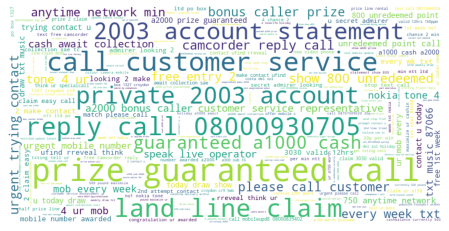

In [57]:
# value_counts bc we want the most commonly occuring bigrams at the forefront
spam_trigrams = pd.Series(nltk.trigrams(spam_words.split())).value_counts()


data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

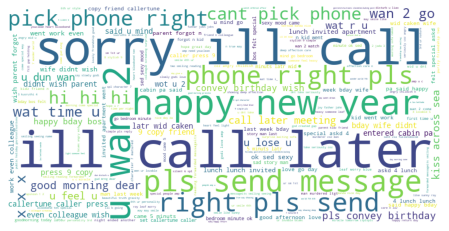

In [58]:
# value_counts bc we want the most commonly occuring bigrams at the forefront
ham_trigrams = pd.Series(nltk.trigrams(ham_words.split())).value_counts()


data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [59]:
ham_trigrams = pd.Series(nltk.trigrams(ham_words.split()))

spam_trigrams = pd.Series(nltk.trigrams(spam_words.split()))



In [60]:


trig_ham_df = pd.DataFrame(pd.Series(make_trigrams_list(ham_trigrams)),columns=['trigram'])
trig_ham_df['sentiment'] = trig_ham_df.trigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

trig_ham_df['label'] = 'spam'

trig_ham_df.head()

,trigram,sentiment,label
0,go jurong point,0.00,spam
1,jurong point crazy,-0.34,spam
2,point crazy available,-0.34,spam
3,crazy available bugis,-0.34,spam
4,available bugis n,0.00,spam


In [61]:
trig_ham_df.sort_values(by='sentiment')

,trigram,sentiment,label
30606,drunk motherfucker hurt,-0.8860,spam
30607,motherfucker hurt tease,-0.8834,spam
2168,enemy say hell,-0.8442,spam
23702,cancer throat hurt,-0.8316,spam
23519,arrested murderer immediately,-0.8271,spam
...,...,...,...
27104,adoring kiss love,0.8910,spam
29353,love loving kiss,0.8979,spam
24603,joy happiness gr8,0.9022,spam
26293,sweetheart darling sexy,0.9100,spam


In [62]:
trig_ham_df.trigram.value_counts()

ill call later            42
sorry ill call            38
u wan 2                   21
happy new year            19
pls send message          13
                          ..
expecting battery hont    1 
week get lag              1 
dobbys bowl car           1 
brother get door          1 
b getting headstart       1 
Name: trigram, Length: 36644, dtype: int64

In [63]:
ham_trigram_freq = pd.Series(make_trigrams_list(ham_trigrams)).value_counts()
spam_trigram_freq = pd.Series(make_trigrams_list(spam_trigrams)).value_counts()

In [64]:
trigram_counts = pd.concat([ham_trigram_freq, spam_trigram_freq], axis=1).fillna(0).astype(int)
trigram_counts.columns = ['ham_trigram', 'spam_trigram']
trigram_counts.head()

,ham_trigram,spam_trigram
ill call later,42,0
sorry ill call,38,0
u wan 2,21,0
happy new year,19,0
pls send message,13,0


In [65]:
trigram_counts[trigram_counts.ham_trigram == trigram_counts.spam_trigram].head(20)

,ham_trigram,spam_trigram
2 c u,2,2
u im home,1,1
u wanna cum,1,1
new year eve,1,1
number im glad,1,1
called left message,1,1
r u im,1,1


# Explore the blog articles using the techniques discussed in the exploration lesson.

### Acquire and Prepare

In [66]:
def further_prep(df, col):
    df['sentences'] = df[col].apply(lambda row: row.splitlines())
    df['words'] = df.sentences.apply(lambda row: [nltk.word_tokenize(i) for i in row])
    df['bigrams'] = df.words.apply(lambda row: [list(nltk.bigrams(i)) for i in row])
    df['trigrams'] = df.words.apply(lambda row: [list(nltk.trigrams(i)) for i in row])
    df['word_count'] = df.lemmatized.apply(str.split).apply(len)
    df['overall_sentiment']= df.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
    return df


In [67]:
blogs_df =acquire.get_blog_articles(cached=False)
blogs_df =prepare.prep_article_data(blogs_df, 'article_content', extra_words=[], exclude_words=['no'])
blogs_df = blogs_df.drop(columns=['article_content', 'clean','stemmed'])
blogs_df = further_prep(blogs_df,'lemmatized')

blogs_df.head(2)


,title,date_published,lemmatized,sentences,words,bigrams,trigrams,word_count,overall_sentiment
0,Codeup Start Dates for March 2022,"Jan 26, 2022",approach end january wanted look forward next start date current program full stack web development 3722 full stack web development first program built also popular youve asked listened next web development cohort start 372022 entirely virtual seat go fast one indemand job country software web development tech career newest job u 15 million developer job 250000 remain open high growth rate 13 data science 32222 first new data science class 2022 start monday 3222022 downtown campus vogue building consider pivoting career data science 1 job america 20162020 glassdoor 650 increase data science position since 2012 nearly 12 million new job 2019 2029 31 tenyear growth rate supply data scientist remains painfully low compared outrageous demand help close gap launching fulfilling secure highpaying career one best country employer scrambling find talent due lack qualified applicant help fill gap futureproofing skillset flexibility security salary youve always wanted career ready launch career tech apply today admission team save seat get name list application found want experience codeup early join one workshop get intro specific coding language learn financing option maybe even code resume event located cant wait help launch career tech,[approach end january wanted look forward next start date current program full stack web development 3722 full stack web development first program built also popular youve asked listened next web development cohort start 372022 entirely virtual seat go fast one indemand job country software web development tech career newest job u 15 million developer job 250000 remain open high growth rate 13 data science 32222 first new data science class 2022 start monday 3222022 downtown campus vogue building consider pivoting career data science 1 job america 20162020 glassdoor 650 increase data science position since 2012 nearly 12 million new job 2019 2029 31 tenyear growth rate supply data scientist remains painfully low compared outrageous demand help close gap launching fulfilling secure highpaying career one best country employer scrambling find talent due lack qualified applicant help fill gap futureproofing skillset flexibility security salary youve always wanted career ready launch career tech apply today admission team save seat get name list application found want experience codeup early join one workshop get intro specific coding language learn financing option maybe even code resume event located cant wait help launch career tech],"[[approach, end, january, wanted, look, forward, next, start, date, current, program, full, stack, web, development, 3722, full, stack, web, development, first, program, built, also, popular, youve, asked, listened, next, web, development, cohort, start, 372022, entirely, virtual, seat, go, fast, one, indemand, job, country, software, web, development, tech, career, newest, job, u, 15, million, developer, job, 250000, remain, open, high, growth, rate, 13, data, science, 32222, first, new, data, science, class, 2022, start, monday, 3222022, downtown, campus, vogue, building, consider, pivoting, career, data, science, 1, job, america, 20162020, glassdoor, 650, increase, data, science, position, since, 2012, nearly, 12, million, new, job, ...]]","[[(approach, end), (end, january), (january, wanted), (wanted, look), (look, forward), (forward, next), (next, start), (start, date), (date, current), (current, program), (program, full), (full, stack), (stack, web), (web, development), (development, 3722), (3722, full), (full, stack), (stack, web), (web, development), (development, first), (first, program), (program, built), (built, also), (also, popular), (popular, youve), (youve, asked), (asked, listened), (listened, next), (next, web), (web, development), (development, cohort), (cohort, start), (start, 372022), (372022, entirely), (enti

In [68]:
blogs_bigrams_df = pd.DataFrame(blogs_df.words.apply(lambda row: [list(nltk.bigrams(i)) for i in row]))#, columns=['bigrams'])
# blogs_bigrams_df['sentiment']= blogs_df.words.apply(lambda doc: sia.polarity_scores(doc)['compound']).mean()
blogs_bigrams_df.rename(columns={'words':'bigrams'}, inplace=True)
# blogs_bigrams_df.bigrams = lambda row: [blogs_bigrams_df.bigrams[0] for i in row]
blogs_bigrams_df.head(2)

,bigrams
0,"[[(approach, end), (end, january), (january, wanted), (wanted, look), (look, forward), (forward, next), (next, start), (start, date), (date, current), (current, program), (program, full), (full, stack), (stack, web), (web, development), (development, 3722), (3722, full), (full, stack), (stack, web), (web, development), (development, first), (first, program), (program, built), (built, also), (also, popular), (popular, youve), (youve, asked), (asked, listened), (listened, next), (next, web), (web, development), (development, cohort), (cohort, start), (start, 372022), (372022, entirely), (entirely, virtual), (virtual, seat), (seat, go), (go, fast), (fast, one), (one, indemand), (indemand, job), (job, country), (country, software), (software, web), (web, development), (development, tech), (tech, career), (career, newest), (newest, job), (job, u), (u, 15), (15, million), (million, developer), (developer, job), (job, 250000), (250000, remain), (remain, open), (open, high), (high, growth), (growth, rate), (rate, 13), (13, data), (data, science), (science, 32222), (32222, first), (first, new), (new, data), (data, science), (science, class), (class, 2022), (2022, start), (start, monday), (monday, 3222022), (3222022, downtown), (downtown, campus), (campus, vogue), (vogue, building), (building, consider), (consider, pivoting), (pivoting, career), (career, data), (data, science), (science, 1), (1, job), (job, america), (america, 20162020), (20162020, glassdoor), (glassdoor, 650), (650, increase), (increase, data), (data, science), (science, position), (position, since), (since, 2012), (2012, nearly), (nearly, 12), (12, million), (million, new), (new, job), (job, 2019), ...]]"
1,"[[(happy, announce), (announce, vet), (vet, tec), (tec, benefit), (benefit, available), (available, used), (used, campus), (campus, located), (located, dallas), (dallas, tx), (tx, next), (next, dallas), (dallas, start), (start, date), (date, web), (web, development), (development, program), (program, january), (january, 31st), (31st, 2022), (2022, dont), (dont, want), (want, delay), (delay, application), (application, type), (type, funding), (funding, limited), (limited, apply), (apply, web), (web, development), (development, program), (program, note), (note, interested), (interested, using), (using, vet), (vet, tec), (tec, vet), (vet, tec), (tec, inperson), (inperson, workshop), (workshop, dallas), (dallas, campus), (campus, 11222), (11222, hosting), (hosting, vet), (vet, tech), (tech, workshop), (workshop, next), (next, wednesday), (wednesday, evening), (evening, dallas), (dallas, campus), (campus, discus), (discus, everything), (everything, new), (new, funding), (funding, option), (option, dallas), (dallas, veteran), (veteran, one), (one, coding), (coding, bootcamps), (bootcamps, dallas), (dallas, approved), (approved, use), (use, vet), (vet, tec), (tec, funding), (funding, workshop), (workshop, go), (go, codeup), (codeup, best), (best, place), (place, use), (use, benefit), (benefit, help), (help, launch), (launch, career), (career, tech), (tech, youre), (youre, military), (military, detail), (detail, event), (event, link), (link, grab), (grab, free), (free, ticket), (ticket, found), (found, vet), (vet, tec), (tec, program), (program, detail), (detail, eligibility), (eligibility, requirement), (requirement, listed), (listed, also), (also, visit), (visit, vet), (vet, tec), (tec, program), ...]]"


In [69]:
# >>> items = [
# ...     [['SKU', 'DHF', 'KSD'], ['KUD', 'HFK', 'SDJ'], ['UDH', 'FKS', 'DJH']],
# ...     [['KUG', 'UJY', 'FUY'], ['UGU', 'JYF', 'UYF'], ['GUJ', 'YFU', 'YFG']]
# ... ]
from itertools import chain
newlist = list(chain.from_iterable(blogs_bigrams_df.bigrams[0]))

newlist

# newerlist = list(chain.from_iterable(newlist)) 
# newerlist 



[('approach', 'end'),
 ('end', 'january'),
 ('january', 'wanted'),
 ('wanted', 'look'),
 ('look', 'forward'),
 ('forward', 'next'),
 ('next', 'start'),
 ('start', 'date'),
 ('date', 'current'),
 ('current', 'program'),
 ('program', 'full'),
 ('full', 'stack'),
 ('stack', 'web'),
 ('web', 'development'),
 ('development', '3722'),
 ('3722', 'full'),
 ('full', 'stack'),
 ('stack', 'web'),
 ('web', 'development'),
 ('development', 'first'),
 ('first', 'program'),
 ('program', 'built'),
 ('built', 'also'),
 ('also', 'popular'),
 ('popular', 'youve'),
 ('youve', 'asked'),
 ('asked', 'listened'),
 ('listened', 'next'),
 ('next', 'web'),
 ('web', 'development'),
 ('development', 'cohort'),
 ('cohort', 'start'),
 ('start', '372022'),
 ('372022', 'entirely'),
 ('entirely', 'virtual'),
 ('virtual', 'seat'),
 ('seat', 'go'),
 ('go', 'fast'),
 ('fast', 'one'),
 ('one', 'indemand'),
 ('indemand', 'job'),
 ('job', 'country'),
 ('country', 'software'),
 ('software', 'web'),
 ('web', 'development'),
 (

### putting all this prep to bed for now

### Explore

### Does article length relate to sentiment score?

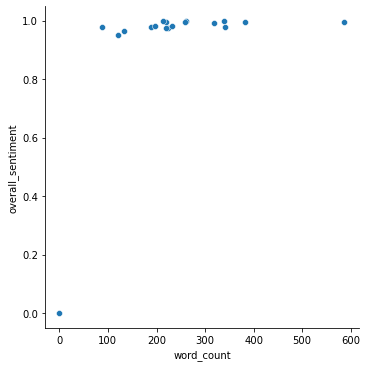

In [70]:
sns.relplot(data = blogs_df, x = 'word_count', y = 'overall_sentiment')#, hue = 'label')



- We're generally the same length and very positive
- Which one has a 0 word count?

In [71]:
# blogs_df.word_count.idxmin()
blogs_df.title[11]

'Boris – Behind the Billboards'

In [72]:
blogs_df[blogs_df.title == 'Boris – Behind the Billboards']

,title,date_published,lemmatized,sentences,words,bigrams,trigrams,word_count,overall_sentiment
11,Boris – Behind the Billboards,"Oct 3, 2021",,[],[],[],[],0,0.0


- The parser didn't capture any text for this one, apparently
- Or maybe there isn't an actual article/text?

In [73]:
blogs_df.head(1)

,title,date_published,lemmatized,sentences,words,bigrams,trigrams,word_count,overall_sentiment
0,Codeup Start Dates for March 2022,"Jan 26, 2022",approach end january wanted look forward next start date current program full stack web development 3722 full stack web development first program built also popular youve asked listened next web development cohort start 372022 entirely virtual seat go fast one indemand job country software web development tech career newest job u 15 million developer job 250000 remain open high growth rate 13 data science 32222 first new data science class 2022 start monday 3222022 downtown campus vogue building consider pivoting career data science 1 job america 20162020 glassdoor 650 increase data science position since 2012 nearly 12 million new job 2019 2029 31 tenyear growth rate supply data scientist remains painfully low compared outrageous demand help close gap launching fulfilling secure highpaying career one best country employer scrambling find talent due lack qualified applicant help fill gap futureproofing skillset flexibility security salary youve always wanted career ready launch career tech apply today admission team save seat get name list application found want experience codeup early join one workshop get intro specific coding language learn financing option maybe even code resume event located cant wait help launch career tech,[approach end january wanted look forward next start date current program full stack web development 3722 full stack web development first program built also popular youve asked listened next web development cohort start 372022 entirely virtual seat go fast one indemand job country software web development tech career newest job u 15 million developer job 250000 remain open high growth rate 13 data science 32222 first new data science class 2022 start monday 3222022 downtown campus vogue building consider pivoting career data science 1 job america 20162020 glassdoor 650 increase data science position since 2012 nearly 12 million new job 2019 2029 31 tenyear growth rate supply data scientist remains painfully low compared outrageous demand help close gap launching fulfilling secure highpaying career one best country employer scrambling find talent due lack qualified applicant help fill gap futureproofing skillset flexibility security salary youve always wanted career ready launch career tech apply today admission team save seat get name list application found want experience codeup early join one workshop get intro specific coding language learn financing option maybe even code resume event located cant wait help launch career tech],"[[approach, end, january, wanted, look, forward, next, start, date, current, program, full, stack, web, development, 3722, full, stack, web, development, first, program, built, also, popular, youve, asked, listened, next, web, development, cohort, start, 372022, entirely, virtual, seat, go, fast, one, indemand, job, country, software, web, development, tech, career, newest, job, u, 15, million, developer, job, 250000, remain, open, high, growth, rate, 13, data, science, 32222, first, new, data, science, class, 2022, start, monday, 3222022, downtown, campus, vogue, building, consider, pivoting, career, data, science, 1, job, america, 20162020, glassdoor, 650, increase, data, science, position, since, 2012, nearly, 12, million, new, job, ...]]","[[(approach, end), (end, january), (january, wanted), (wanted, look), (look, forward), (forward, next), (next, start), (start, date), (date, current), (current, program), (program, full), (full, stack), (stack, web), (web, development), (development, 3722), (3722, full), (full, stack), (stack, web), (web, development), (development, first), (first, program), (program, built), (built, also), (also, popular), (popular, youve), (youve, asked), (asked, listened), (listened, next), (next, web), (web, development), (development, cohort), (cohort, start), (start, 372022), (372022, entirely), (enti

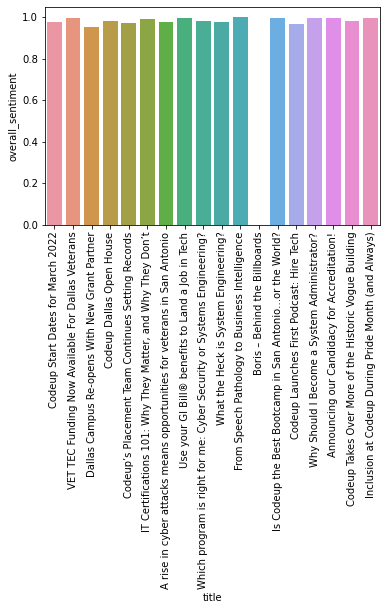

In [74]:
sns.barplot(data=blogs_df, x='title', y='overall_sentiment')
plt.xticks(rotation=90);

- Why doesn't 'Boris' have any sentiment? bc there is no content there

In [75]:
blogs_df.title

0     Codeup Start Dates for March 2022                                      
1     VET TEC Funding Now Available For Dallas Veterans                      
2     Dallas Campus Re-opens With New Grant Partner                          
3     Codeup Dallas Open House                                               
4     Codeup’s Placement Team Continues Setting Records                      
5     IT Certifications 101: Why They Matter, and Why They Don’t             
6     A rise in cyber attacks means opportunities for veterans in San Antonio
7     Use your GI Bill® benefits to Land a Job in Tech                       
8     Which program is right for me: Cyber Security or Systems Engineering?  
9     What the Heck is System Engineering?                                   
10    From Speech Pathology to Business Intelligence                         
11    Boris – Behind the Billboards                                          
12    Is Codeup the Best Bootcamp in San Antonio…or the World?  

In [76]:
blogs_df.lemmatized

0     approach end january wanted look forward next start date current program full stack web development 3722 full stack web development first program built also popular youve asked listened next web development cohort start 372022 entirely virtual seat go fast one indemand job country software web development tech career newest job u 15 million developer job 250000 remain open high growth rate 13 data science 32222 first new data science class 2022 start monday 3222022 downtown campus vogue building consider pivoting career data science 1 job america 20162020 glassdoor 650 increase data science position since 2012 nearly 12 million new job 2019 2029 31 tenyear growth rate supply data scientist remains painfully low compared outrageous demand help close gap launching fulfilling secure highpaying career one best country employer scrambling find talent due lack qualified applicant help fill gap futureproofing skillset flexibility security salary youve always wanted career ready launch c

In [78]:
# for_word_cloud = 
# blogs_df.drop(blogs_df.iloc[11])

### Problems getting wordcloud rolling

In [80]:
# from wordcloud import WordCloud
# for x in blogs_df.lemmatized.drop('Boris – Behind the Billboards', axis=0):
#     img = WordCloud(background_color='white', width=800, height=600).generate(x)
# plt.imshow(img)
# plt.axis('off')

# Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [85]:
def further_news_prep(df, col):
    df['sentences'] = df[col].apply(lambda row: row.splitlines())
    df['words'] = df.sentences.apply(lambda row: [nltk.word_tokenize(i) for i in row])
    df['bigrams'] = df.words.apply(lambda row: [list(nltk.bigrams(i)) for i in row])
    df['trigrams'] = df.words.apply(lambda row: [list(nltk.trigrams(i)) for i in row])
    df['word_count'] = df.lemmatized.apply(str.split).apply(len)
    df['overall_sentiment']= df.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
#     df['title_sentiment']=df.title.apply(lambda doc: sia.polarity_scores(doc)['compound'])
    return df

In [89]:
news_df =acquire.get_news_articles(cached=False)
news_df =prepare.prep_article_data(news_df, 'content', extra_words=[], exclude_words=['no'])
news_df = news_df.drop(columns=['content', 'clean','stemmed'])
news_df = further_prep(news_df,'lemmatized')
news_df['title_sentiment']=news_df.title.apply(lambda doc: sia.polarity_scores(doc)['compound'])

news_df.head(2)

,section,title,author,date_published,lemmatized,sentences,words,bigrams,trigrams,word_count,overall_sentiment,title_sentiment
0,business,There's no greater tribute to our unity than Lata Didi: Gautam Adani,Hiral Goyal,"06 Feb 2022,Sunday",adani group chairman gautam adani took twitter condole demise veteran singer lata mangeshkar wrote no greater tribute unity lata didi added anyone represented india wa lata didi lending incomparable voice song 36 language lata mangeshkar passed away aged 92 sunday,[adani group chairman gautam adani took twitter condole demise veteran singer lata mangeshkar wrote no greater tribute unity lata didi added anyone represented india wa lata didi lending incomparable voice song 36 language lata mangeshkar passed away aged 92 sunday],"[[adani, group, chairman, gautam, adani, took, twitter, condole, demise, veteran, singer, lata, mangeshkar, wrote, no, greater, tribute, unity, lata, didi, added, anyone, represented, india, wa, lata, didi, lending, incomparable, voice, song, 36, language, lata, mangeshkar, passed, away, aged, 92, sunday]]","[[(adani, group), (group, chairman), (chairman, gautam), (gautam, adani), (adani, took), (took, twitter), (twitter, condole), (condole, demise), (demise, veteran), (veteran, singer), (singer, lata), (lata, mangeshkar), (mangeshkar, wrote), (wrote, no), (no, greater), (greater, tribute), (tribute, unity), (unity, lata), (lata, didi), (didi, added), (added, anyone), (anyone, represented), (represented, india), (india, wa), (wa, lata), (lata, didi), (didi, lending), (lending, incomparable), (incomparable, voice), (voice, song), (song, 36), (36, language), (language, lata), (lata, mangeshkar), (mangeshkar, passed), (passed, away), (away, aged), (aged, 92), (92, sunday)]]","[[(adani, group, chairman), (group, chairman, gautam), (chairman, gautam, adani), (gautam, adani, took), (adani, took, twitter), (took, twitter, condole), (twitter, condole, demise), (condole, demise, veteran), (demise, veteran, singer), (veteran, singer, lata), (singer, lata, mangeshkar), (lata, mangeshkar, wrote), (mangeshkar, wrote, no), (wrote, no, greater), (no, greater, tribute), (greater, tribute, unity), (tribute, unity, lata), (unity, lata, didi), (lata, didi, added), (didi, added, anyone), (added, anyone, represented), (anyone, represented, india), (represented, india, wa), (india, wa, lata), (wa, lata, didi), (lata, didi, lending), (didi, lending, incomparable), (lending, incomparable, voice), (incomparable, voice, song), (voice, song, 36), (song, 36, language), (36, language, lata), (language, lata, mangeshkar), (lata, mangeshkar, passed), (mangeshkar, passed, away), (passed, away, aged), (away, aged, 92), (aged, 92, sunday)]]",40,0.0772,0.0772
1,business,Nostalgia with moist eyes & lump in throat: Kotak on Lata Mangeshkar's demise,Kiran Khatri,"06 Feb 2022,Sunday",kotak mahindra bank md uday kotak took twitter condole demise india veteran singer lata mangeshkar india favourite voice nostalgia moist eye lump throat wrote sharing blackandwhite picture late singer earlier businessman anand mahindra several celebrity including priyanka chopra paid tribute social medium,[kotak mahindra bank md uday kotak took twitter condole demise india veteran singer lata mangeshkar india favourite voice nostalgia moist eye lump throat wrote sharing blackandwhite picture late singer earlier businessman anand mahindra several celebrity including priyanka chopra paid tribute social medium],"[[kotak, mahindra, bank, md, uday, kotak, took, twitter, condole, demise, india, veteran, singer, lata, mangeshkar, india, favourite, voice, nostalgia, moist, eye, lump, throat, wrote, sharing, blackandwhite, picture, late, singer, earlier, businessman, anand, mahindra, several, celebrity, including, priyanka, chopra, paid, tribute, social, medium]]","[[(kotak, mahindra), (mahindra, bank), (bank, md), (md, uday), (uday, kotak), (kotak, took), (took, twitter), (twitter, condole), (condole, demise), (demise, india), (india, v

In [90]:
news_df.shape

(100, 12)

In [91]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   section            100 non-null    object 
 1   title              100 non-null    object 
 2   author             100 non-null    object 
 3   date_published     100 non-null    object 
 4   lemmatized         100 non-null    object 
 5   sentences          100 non-null    object 
 6   words              100 non-null    object 
 7   bigrams            100 non-null    object 
 8   trigrams           100 non-null    object 
 9   word_count         100 non-null    int64  
 10  overall_sentiment  100 non-null    float64
 11  title_sentiment    100 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 9.5+ KB


In [92]:
news_df.overall_sentiment.mean()

0.2962700000000001

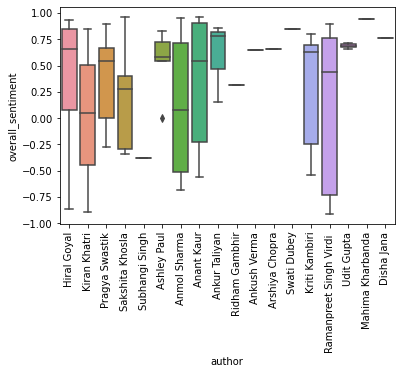

In [93]:
sns.boxplot(data=news_df,x='author',y='overall_sentiment')
plt.xticks(rotation=90);

In [94]:
news_df.groupby(by='author').overall_sentiment.mean().sort_values()

author
Subhangi Singh            -0.381800
Kiran Khatri               0.000718
Ramanpreet Singh Virdi     0.089700
Anmol Sharma               0.107062
Sakshita Khosla            0.186900
Kriti Kambiri              0.254214
Ridham Gambhir             0.318200
Anant Kaur                 0.366960
Hiral Goyal                0.383806
Pragya Swastik             0.405300
Ashley Paul                0.537340
Ankur Taliyan              0.597700
Ankush Verma               0.648600
Arshiya Chopra             0.659700
Udit Gupta                 0.689050
Disha Jana                 0.765000
Swati Dubey                0.851900
Mahima Kharbanda           0.945100
Name: overall_sentiment, dtype: float64

In [112]:
news_df.author.value_counts()

Hiral Goyal                17
Anmol Sharma               13
Kiran Khatri               11
Pragya Swastik             11
Anant Kaur                 10
Sakshita Khosla            9 
Kriti Kambiri              7 
Ramanpreet Singh Virdi     5 
Ashley Paul                5 
Ankur Taliyan              3 
Udit Gupta                 2 
Arshiya Chopra             1 
Swati Dubey                1 
Disha Jana                 1 
Subhangi Singh             1 
Ridham Gambhir             1 
Mahima Kharbanda           1 
Ankush Verma               1 
Name: author, dtype: int64

In [101]:
news_df.groupby(by='author').word_count.mean().sort_values()

author
Ankush Verma               29.000000
Ridham Gambhir             31.000000
Swati Dubey                33.000000
Ramanpreet Singh Virdi     33.600000
Udit Gupta                 36.000000
Pragya Swastik             36.727273
Kriti Kambiri              36.857143
Subhangi Singh             37.000000
Arshiya Chopra             37.000000
Mahima Kharbanda           37.000000
Ankur Taliyan              38.000000
Sakshita Khosla            38.333333
Ashley Paul                38.400000
Hiral Goyal                38.823529
Kiran Khatri               39.000000
Anant Kaur                 40.400000
Anmol Sharma               40.846154
Disha Jana                 44.000000
Name: word_count, dtype: float64

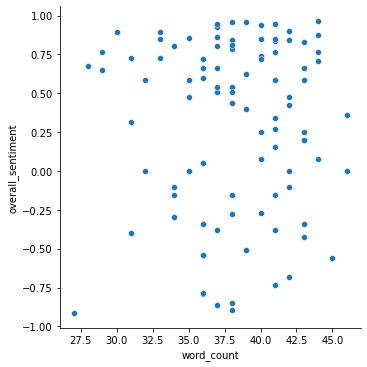

In [102]:
sns.relplot(data=news_df,x='word_count',y='overall_sentiment')

In [115]:
sentiments = news_df[['title','author','section','overall_sentiment','title_sentiment']]
sentiments['sentiment_difference']=sentiments.overall_sentiment-sentiments.title_sentiment
sentiments

<ipython-input-115-fed7c199e4fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments['sentiment_difference']=sentiments.overall_sentiment-sentiments.title_sentiment


,title,author,section,overall_sentiment,title_sentiment,sentiment_difference
0,There's no greater tribute to our unity than Lata Didi: Gautam Adani,Hiral Goyal,business,0.0772,0.0772,0.0000
1,Nostalgia with moist eyes & lump in throat: Kotak on Lata Mangeshkar's demise,Kiran Khatri,business,0.4215,0.0000,0.4215
2,What can you say when you no longer have your voice: Mahindra on Lata Mangeshkar,Kiran Khatri,business,0.0516,-0.2960,0.3476
3,Lata Mangeshkar will eternally cast her shadow over us: Shaw on 'Tu Jahan Jahan Chalega',Kiran Khatri,business,-0.1027,0.0000,-0.1027
4,I used to catch Patna-Banaras train to listen to Lata ji's songs in theatre: Anil Agarwal,Pragya Swastik,business,-0.2732,0.0000,-0.2732
...,...,...,...,...,...,...
95,India lost a great daughter: Manmohan Singh on Lata Mangeshkar,Ramanpreet Singh Virdi,entertainment,0.4404,0.4215,0.0189
96,"Sang 'Subhanallah' in 'Yeh Jawaani...', it wasn't kept in the film: Sonu",Udit Gupta,entertainment,0.6597,0.0000,0.6597
97,Lata ji's 'Ae mere watan ke logo' song leaves all teary-eyed: Rajnath,Disha Jana,entertainment,0.7650,0.0000,0.7650
98,"I don't think there's a perfect relationship, don't want it: Ananya",Kriti Kambiri,entertainment,0.6784,-0.4973,1.1757


In [116]:
sentiments.sort_values(by='sentiment_difference').head(5)

,title,author,section,overall_sentiment,title_sentiment,sentiment_difference
26,Manchester United footballers who survived air crash played after 13 days,Anmol Sharma,sports,-0.6808,0.7003,-1.3811
67,"Reliance Jio network down in Mumbai, users share memes on Twitter",Kiran Khatri,technology,-0.7906,0.2960,-1.0866
48,Faced challenges but my only aim was to improve as player: Sundar,Anant Kaur,sports,-0.4019,0.6124,-1.0143
70,Joe Rogan apologises for past use of racial slur on his podcast,Hiral Goyal,technology,-0.7845,0.2023,-0.9868
39,"From 3-0 down, Cameroon win 3rd-place game on penalties at AFCON",Anant Kaur,sports,-0.3818,0.5859,-0.9677


In [117]:
sentiments.sort_values(by='sentiment_difference').tail(5)

,title,author,section,overall_sentiment,title_sentiment,sentiment_difference
74,Bezos' ex-wife MacKenzie donates $133 mn to education non-profit,Hiral Goyal,technology,0.8442,0.0000,0.8442
68,"In a first, Korean tech to be used to monitor Mumbai-Nagpur expressway",Swati Dubey,technology,0.8519,0.0000,0.8519
98,"I don't think there's a perfect relationship, don't want it: Ananya",Kriti Kambiri,entertainment,0.6784,-0.4973,1.1757
80,Subcontinent lost one of world's great singers: Pak PM on Lata Mangeshkar's death,Sakshita Khosla,entertainment,0.9601,-0.2732,1.2333
47,Losing with 22 overs to spare is a heavy defeat: Pollard after 1st ODI vs India,Ankur Taliyan,sports,0.8555,-0.6808,1.5363


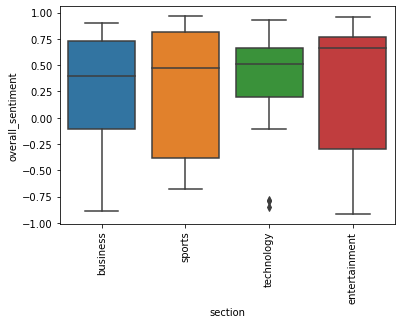

In [118]:
sns.boxplot(data=news_df,x='section',y='overall_sentiment')
plt.xticks(rotation=90);

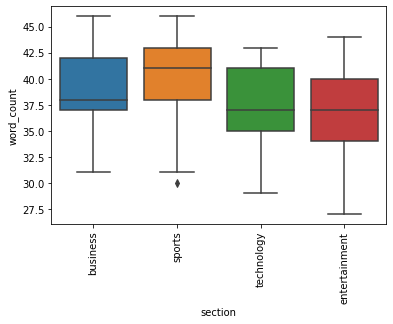

In [119]:
sns.boxplot(data=news_df,x='section',y='word_count')
plt.xticks(rotation=90);